Speedup

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as stats
import pandas as pd

In [98]:
# 7000 connections, 16x32

driver1_7000 = [123695.25649121504,147514.8400815097,137364.52612676038,144602.37964276408,118780.66122423744]
driver2_7000 = [134641.19939836004,109408.23179212655,130395.62476342135,145040.73917058186, 162174.271595639]

driver1_5000 = [130402.77357170456,152358.11936091946,112822.96845248448,135383.09757611403, 140433.64334634112]
driver2_5000 = [119526.2024407753,104600.97711343186,152358.11936091946,129781.38527013754, 137707.62974705355]

driver1_4000 = [128084.14833657283,123237.48195847674,115243.52259880488,131417.62653715213,125921.7243335224]
driver2_4000 = [127821.2805158913,124817.89581266571,113372.25137544713,111458.21711480532, 126115.98125555465]

driver1_6000 = [118652.84481775684, 99245.37749007547,123642.28640454667]
driver2_6000 = [127368.233164189, 108371.62681107539, 151195.946314088]

tps_7000 = [i + j for i,j in zip(driver1_7000, driver2_7000)]
tps_5000 = [i + j for i,j in zip(driver1_5000, driver2_5000)]
tps_4000 = [i + j for i,j in zip(driver1_4000, driver2_4000)]
tps_6000 = [i + j for i,j in zip(driver1_6000, driver2_6000)]


In [102]:
tot = [tps_4000, tps_5000, tps_6000, tps_7000]
tps1000 = 56758.27549786261 + 56248.92211410519
tps1001 = 55693.72728151103 + 55443.934573679566

totaltps = [tps1000, tps1001]

for i in tot:
    totaltps.extend(i)

frequency = [2, 5, 5, 3, 5]
conn = [[1000], [4000], [5000], [6000], [7000]]

xaxis = []
for i, j in list(zip(frequency, conn)):
    xaxis.extend(i*j)

values = list(zip(totaltps, xaxis))

In [103]:
print(tps_7000,tps_5000)
print(tps_4000)
print(stats.stdev(tps_7000),stats.stdev(tps_5000), stats.stdev(tps_4000))

tps = [stats.mean(tps_4000), stats.mean(tps_5000), stats.mean(tps_7000)]
xaxis = [4000, 5000, 7000]

[258336.45588957507, 256923.07187363625, 267760.1508901817, 289643.1188133459, 280954.93281987647] [249928.97601247986, 256959.0964743513, 265181.0878134039, 265164.4828462516, 278141.2730933947]
[255905.42885246413, 248055.37777114246, 228615.773974252, 242875.84365195746, 252037.70558907706]
14276.784562626111 10559.54961138721 10600.799086270497


In [36]:
3*xaxis

[4000, 5000, 7000, 4000, 5000, 7000, 4000, 5000, 7000]

In [104]:
data = pd.DataFrame(values, columns=['TPS', 'Connections'])
data

,TPS,Connections
0,113007.197612,1000
1,111137.661855,1000
2,255905.428852,4000
3,248055.377771,4000
4,228615.773974,4000
5,242875.843652,4000
6,252037.705589,4000
7,249928.976012,5000
8,256959.096474,5000
9,265181.087813,5000


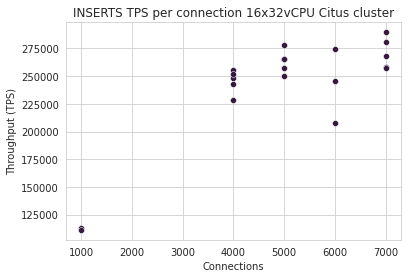

In [105]:
# Applying a Style to Your Seaborn Graph
import matplotlib

sns.set_style('whitegrid')
sns.set_palette("rocket")
sns.scatterplot(data=data,
    x="Connections",
    y="TPS",
    markers="o"
)
plt.xlabel('Connections')
plt.ylabel("Throughput (TPS)")
plt.title("INSERTS TPS per connection 16x32vCPU Citus cluster")
plt.show()

NameError: name 'mean' is not defined

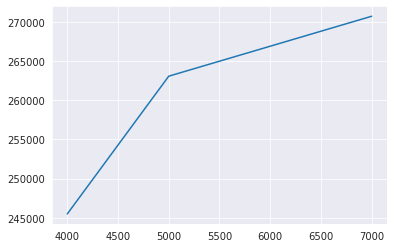

In [26]:
import numpy as np;
import seaborn as sns;
import pandas as pd
import matplotlib.pyplot as plt

ax = sns.lineplot(x=xaxis, y=tps)
ax.errorbar(mean, yerr=std, fmt='-o') #, err_style="unit_traces")
